In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[5]

In [6]:
single_image.shape

(28, 28)

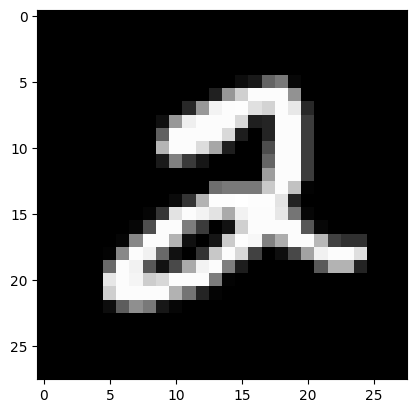

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

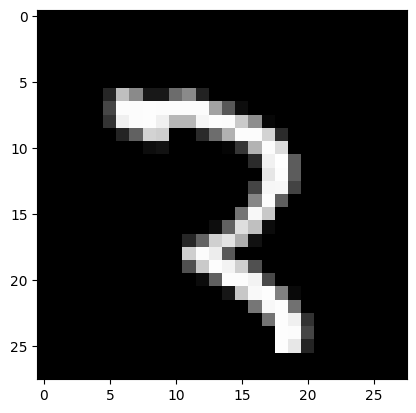

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [21]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │          86,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 87,738 (342.73 KB)

 Trainable params: 87,738 (342.73 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 63ms/step - accuracy: 0.7792 - loss: 0.6744 - val_accuracy: 0.9623 - val_loss: 0.1254
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 43ms/step - accuracy: 0.9660 - loss: 0.1159 - val_accuracy: 0.9758 - val_loss: 0.0780
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.9762 - loss: 0.0790 - val_accuracy: 0.9772 - val_loss: 0.0720
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.9806 - loss: 0.0657 - val_accuracy: 0.9808 - val_loss: 0.0612
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.9845 - loss: 0.0523 - val_accuracy: 0.9807 - val_loss: 0.0587


In [25]:
metrics = pd.DataFrame(model.history.history)

In [25]:
print('''ARUN KUMAR SUKDEV CHAVAN
212222230013''')
print(metrics.head())

In [26]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


ARUN KUMAR SUKDEV CHAVAN
212222230013


<Axes: >

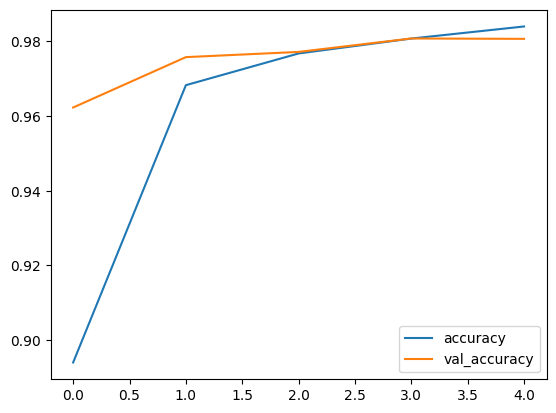

In [27]:
print('''ARUN KUMAR SUKDEV CHAVAN
212222230013''')
metrics[['accuracy','val_accuracy']].plot()

ARUN KUMAR SUKDEV CHAVAN
212222230013


<Axes: >

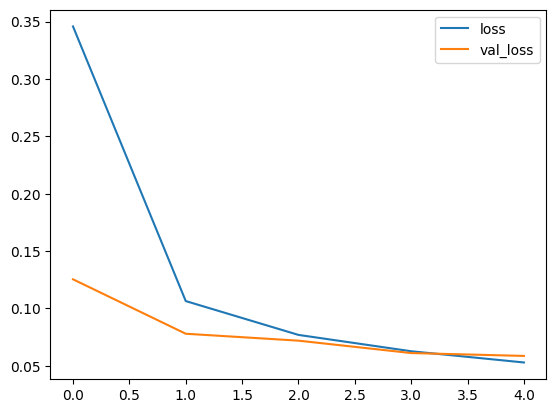

In [36]:
print('''ARUN KUMAR SUKDEV CHAVAN
212222230013''')
metrics[['loss','val_loss']].plot()

In [37]:
print('''ARUN KUMAR SUKDEV CHAVAN
212222230013''')
print(confusion_matrix(y_test,x_test_predictions))

ARUN KUMAR SUKDEV CHAVAN
212222230013
[[ 976    0    1    0    0    1    0    2    0    0]
 [   0 1128    1    1    0    0    3    0    2    0]
 [   5    3 1012    1    1    0    0    8    1    1]
 [   1    0    2  991    0    6    0    4    5    1]
 [   2    1    2    0  961    0    2    2    2   10]
 [   2    0    1    7    0  873    6    0    2    1]
 [  11    3    1    0    1    3  936    0    3    0]
 [   1    3    9    1    0    0    0 1010    2    2]
 [   8    0    6    0    3    2    0    4  949    2]
 [   5    1    1    7    4    4    0    8    8  971]]


In [38]:
print('''ARUN KUMAR SUKDEV CHAVAN
212222230013''')
print(classification_report(y_test,x_test_predictions))

ARUN KUMAR SUKDEV CHAVAN
212222230013
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



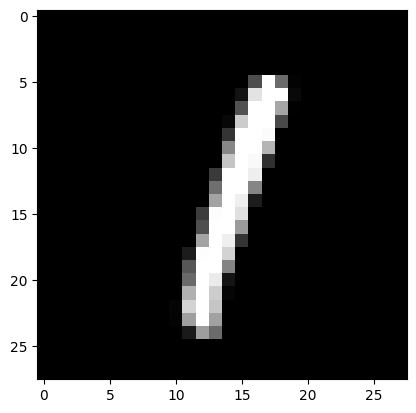

In [39]:
img = X_test_scaled[5]
img.shape
plt.imshow(img,cmap='gray')

In [40]:
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_tensor.shape
img_28 = tf.image.resize(img_tensor,(28,28))
#img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28.numpy()/255.0

In [41]:
x_single_prediction = np.argmax(model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [42]:
print(x_single_prediction)

[1]


ARUN KUMAR SUKDEV CHAVAN
212222230013


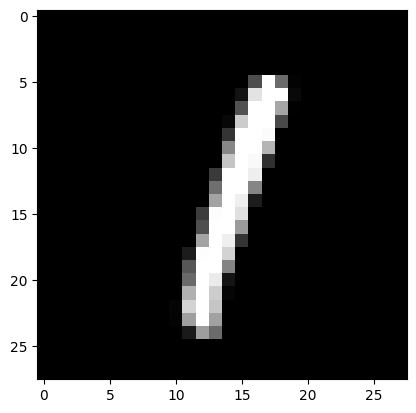

In [43]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
print('''ARUN KUMAR SUKDEV CHAVAN
212222230013''')